In [4]:
#Participants
#00662 TW is a Taiwan listed ETF that resembles the QQQ in the US
#TAIEX

#Package
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [5]:
# Read excel file
file_path = r'D:\Derivatives Trading\00662 vs TAIEX.xlsx'
df = pd.read_excel(file_path, index_col='Date', parse_dates=True)

In [8]:

# Calculate daily returns
returns = df.pct_change().dropna()

In [9]:
# Calculate risk metrics
annual_returns = returns.mean() * 252
annual_vol = returns.std() * np.sqrt(252)
sharpe_ratio = annual_returns / annual_vol

# Maximum drawdown calculation
def calculate_max_drawdown(prices):
    peak = prices.expanding(min_periods=1).max()
    drawdown = (prices - peak) / peak
    return drawdown.min()

max_drawdown = df.apply(calculate_max_drawdown)

# Beta calculation (using TAIEX as market proxy)
def calculate_beta(returns, market_returns):
    covariance = returns.cov(market_returns)
    market_variance = market_returns.var()
    return covariance / market_variance

beta = calculate_beta(returns['00662 TW'], returns['TAIEX'])

# Create summary statistics
summary_stats = pd.DataFrame({
    'Annual Return': annual_returns,
    'Annual Volatility': annual_vol,
    'Sharpe Ratio': sharpe_ratio,
    'Maximum Drawdown': max_drawdown,
    'Beta (vs TAIEX)': [beta, 1.0]
}, index=['00662 TW', 'TAIEX'])

print("\nSummary Statistics:")
print(summary_stats)



Summary Statistics:
          Annual Return  Annual Volatility  Sharpe Ratio  Maximum Drawdown  \
00662 TW       0.206332           0.211018      0.977796         -0.302774   
TAIEX          0.135612           0.163421      0.829834         -0.316319   

          Beta (vs TAIEX)  
00662 TW        -0.002993  
TAIEX            1.000000  


In [10]:
# Calculate correlation
correlation = returns.corr()
print("\nCorrelation Matrix:")
print(correlation)



Correlation Matrix:
          00662 TW     TAIEX
00662 TW  1.000000 -0.002318
TAIEX    -0.002318  1.000000


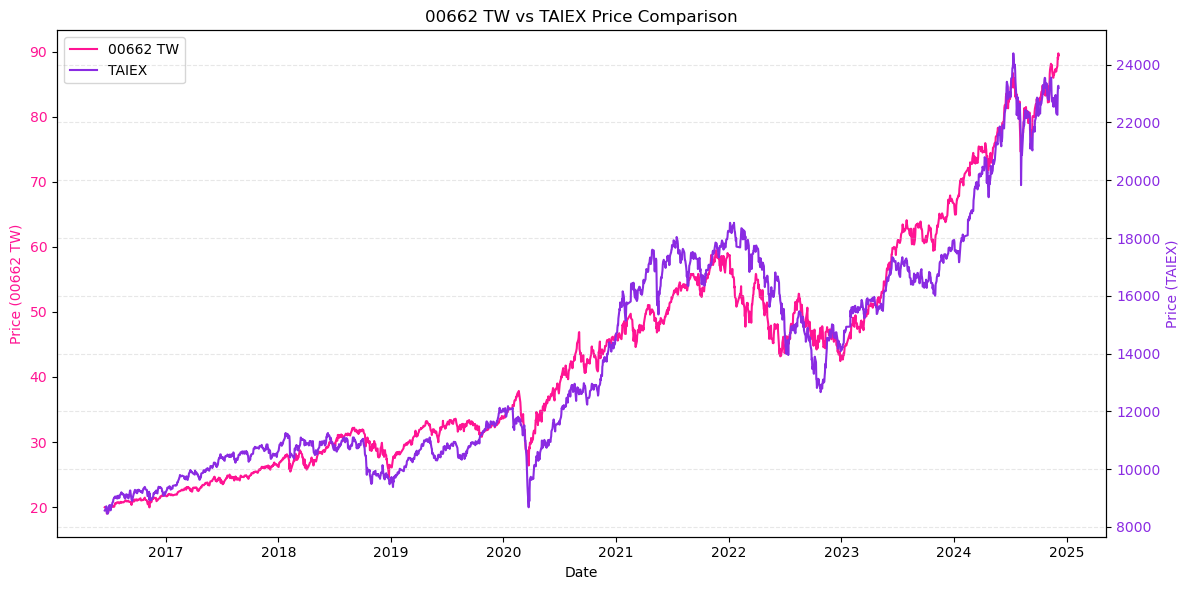

In [11]:
# Create double axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot 00662 TW on left axis
color1 = 'deeppink'
color2 = 'blueviolet'

ax1.plot(df.index, df['00662 TW'], label='00662 TW', color=color1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (00662 TW)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Create second axis for TAIEX
ax2 = ax1.twinx()
ax2.plot(df.index, df['TAIEX'], label='TAIEX', color=color2)
ax2.set_ylabel('Price (TAIEX)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set title and adjust layout
plt.title('00662 TW vs TAIEX Price Comparison')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

In [12]:
# Run regression analysis
X = returns['00662 TW']  # Independent variable
y = returns['TAIEX']  # Dependent variable
X = sm.add_constant(X)  # Add constant for intercept

# Fit regression model
model = sm.OLS(y, X).fit()
print("\nRegression Results:")
print(model.summary())


Regression Results:
                            OLS Regression Results                            
Dep. Variable:                  TAIEX   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01102
Date:                Sat, 07 Dec 2024   Prob (F-statistic):              0.916
Time:                        02:13:07   Log-Likelihood:                 6485.4
No. Observations:                2054   AIC:                        -1.297e+04
Df Residuals:                    2052   BIC:                        -1.296e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.00